In [2]:
using SwiftObjectStores
using ColoringNames
using TensorFlow
using Distributions
using MLDataUtils
using Iterators
using MLLabelUtils
using StaticArrays
using Juno
using StatsBase
using Colors
using Plots

In [3]:
const od =(MLDataUtils.ObsDim.First(), MLDataUtils.ObsDim.Last())
const serv=SwiftService()

const valid_raw = get_file(fh->readdlm(fh,'\t'), serv, "color", "monroe/dev.csv")
const valid_hsv, valid_terms_padded, encoding = prepare_data(valid_raw; do_demacate=false)
const valid_text = valid_raw[:, 1]

#const train_raw = get_file(fh->readdlm(fh,'\t'), serv, "color", "monroe/train.csv")
#const train_hsv, train_terms_padded, encoding = prepare_data(train_raw, encoding; do_demacate=false)
#const train_text = train_raw[:, 1]




108545-element Array{Any,1}:
 "acid green"
 "acid green"
 "acid green"
 "acid green"
 "acid green"
 "acid green"
 "acid green"
 "acid green"
 "acid green"
 "acid green"
 "acid green"
 "acid green"
 "acid green"
 ⋮           
 "yuck"      
 "yuck"      
 "yuck"      
 "yuck"      
 "yuck"      
 "yuck"      
 "yuck"      
 "yuck"      
 "yuck"      
 "yuck"      
 "yuck"      
 "yuck"      

In [4]:
using TensorFlow

In [5]:
include("term2col_dist.jl")

batch_size = size(valid_terms_padded,2)
output_res = 64
n_steps=size(valid_terms_padded,1)
n_classes = nlabel(encoding)+1

sess, optimizer = terms_to_color_dist_network(n_classes, n_steps;
                                            output_res= output_res,
                                            batch_size = batch_size,
                                            embedding_dim = 32,
                                            hidden_layer_size = 256,
                                            learning_rate = 0.5)

2017-05-04 10:16:29.550485: I tensorflow/core/common_runtime/gpu/gpu_device.cc:887] Found device 0 with properties: 
name: Tesla K40c
major: 3 minor: 5 memoryClockRate (GHz) 0.745
pciBusID 0000:02:00.0
Total memory: 11.17GiB
Free memory: 11.10GiB
2017-05-04 10:16:29.550524: I tensorflow/core/common_runtime/gpu/gpu_device.cc:908] DMA: 0 
2017-05-04 10:16:29.550529: I tensorflow/core/common_runtime/gpu/gpu_device.cc:918] 0:   Y 
2017-05-04 10:16:29.550540: I tensorflow/core/common_runtime/gpu/gpu_device.cc:977] Creating TensorFlow device (/gpu:0) -> (device: 0, name: Tesla K40c, pci bus id: 0000:02:00.0)
            errors may be encountered.
 You have 1.0.0 and the new version is 1.0.1.


(Session(Ptr{Void} @0x00007f4111caa3d0),<Tensor Group:1 shape=unknown dtype=Any>)

In [6]:
save_path = joinpath(Pkg.dir("ColoringNames"), "models", "1.jld")
saver = train.Saver()
train.restore(saver, sess, save_path)

In [7]:
const query = querier(sess, batch_size, n_steps; encoding=encoding)
pyplot()

plot_query(input) = plot_hsv(query(input)...)

plot_query (generic function with 1 method)

(h_max,s_max,v_max) = (0.59375,0.203125,0.265625)



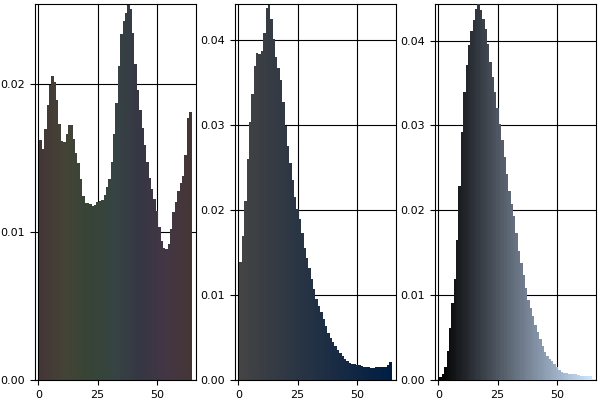

sys:1: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


In [8]:
plot_query("dark grey")

(h_max,s_max,v_max) = (0.125,0.109375,0.65625)



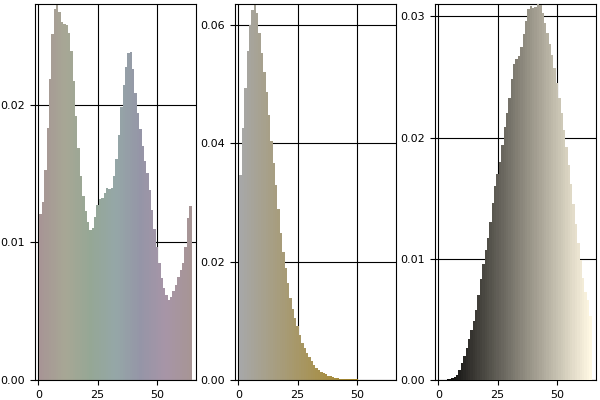

In [9]:
plot_query("grey")

(h_max,s_max,v_max) = (0.203125,0.046875,0.90625)



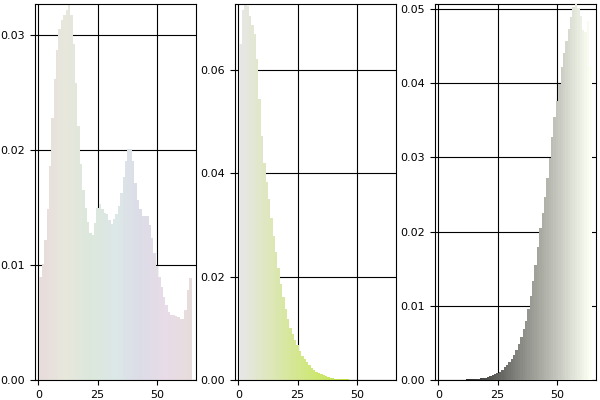

In [10]:
plot_query("light grey")

(h_max,s_max,v_max) = (0.9375,0.984375,0.984375)



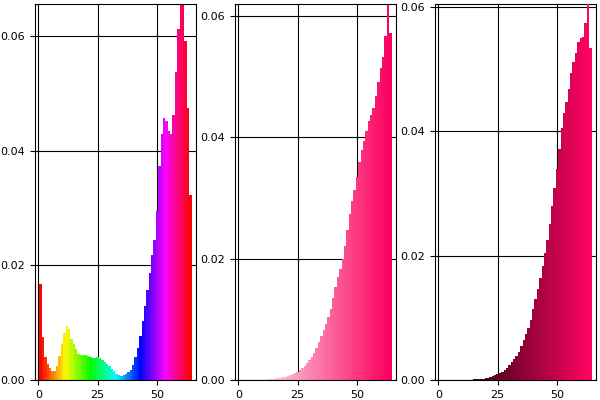

In [11]:
plot_query("acid red")

(h_max,s_max,v_max) = (0.265625,0.984375,0.984375)



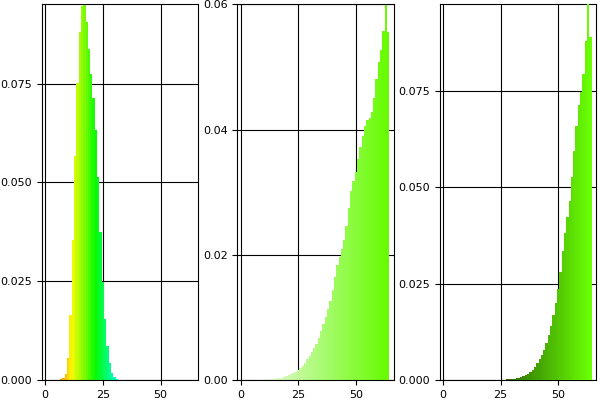

In [12]:
plot_query("acid green")

(h_max,s_max,v_max) = (0.65625,0.984375,0.984375)



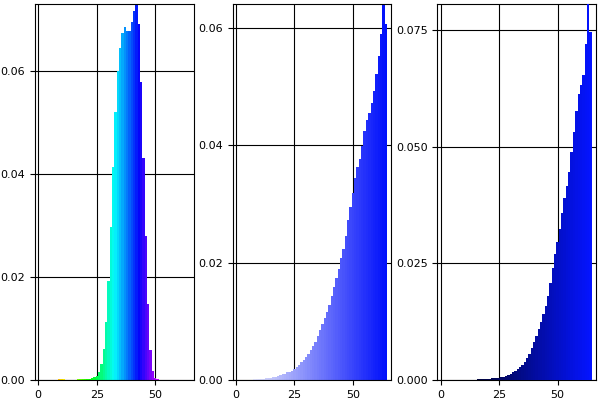

In [13]:
plot_query("acid blue")

(h_max,s_max,v_max) = (0.671875,0.984375,0.984375)



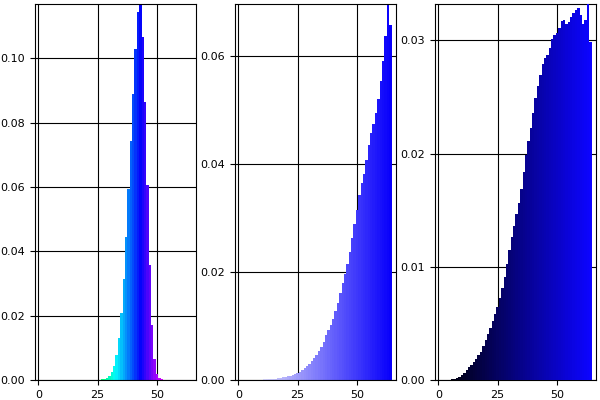

In [14]:
plot_query("hot blue")

(h_max,s_max,v_max) = (0.5,0.984375,0.984375)



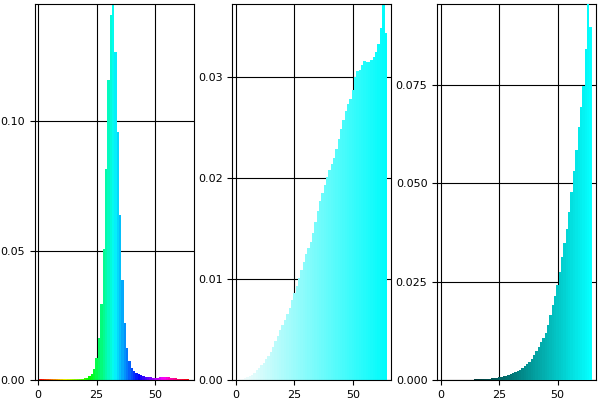

In [15]:
plot_query("hot cyan")

(h_max,s_max,v_max) = (0.90625,0.984375,0.984375)



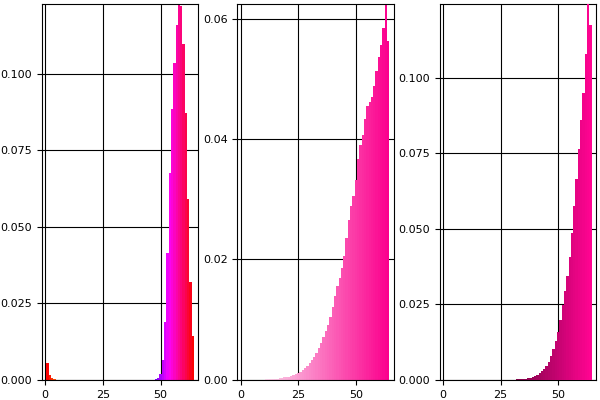

In [16]:
plot_query("hot pink")

(h_max,s_max,v_max) = (0.984375,0.203125,0.984375)



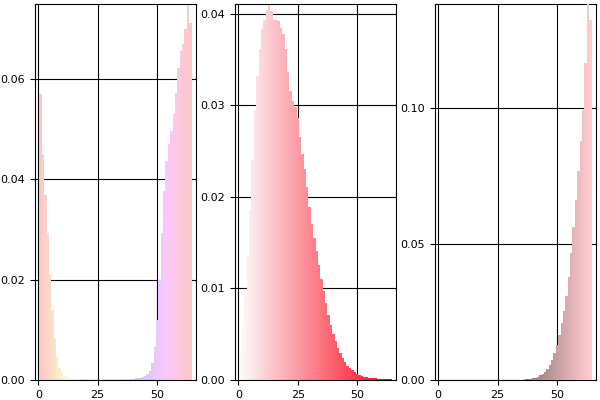

In [17]:
plot_query("pale pink")

(h_max,s_max,v_max) = (0.46875,0.984375,0.984375)



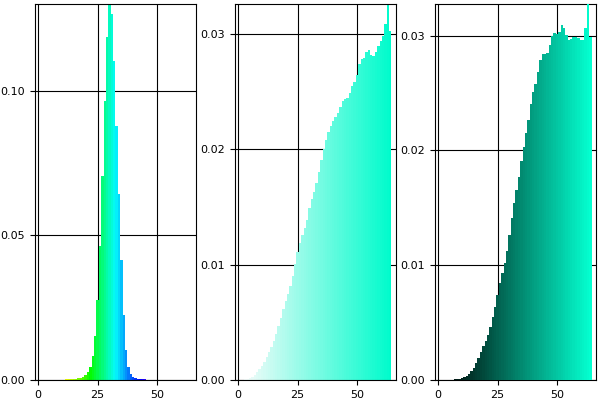

In [18]:
plot_query("teal")

(h_max,s_max,v_max) = (0.484375,0.984375,0.984375)



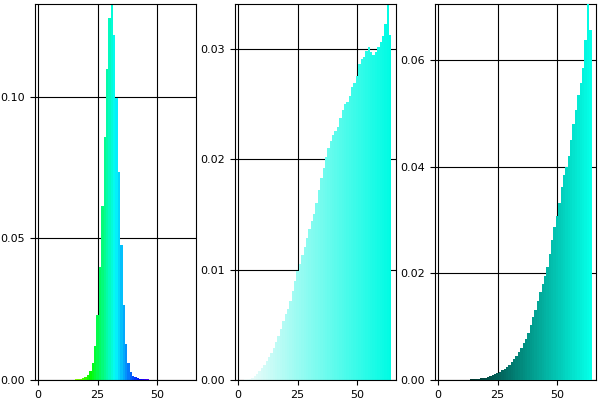

In [19]:
plot_query("aqua")

(h_max,s_max,v_max) = (0.4375,0.984375,0.765625)



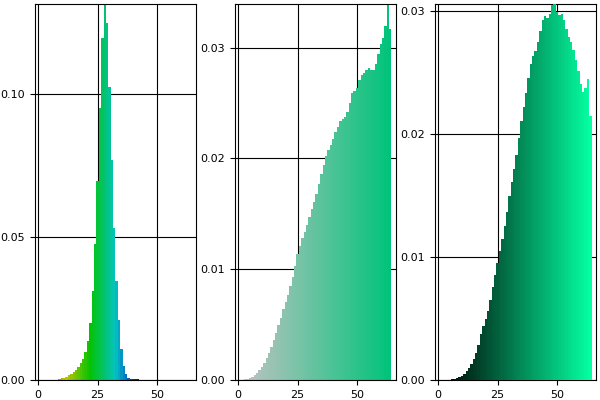

In [20]:
plot_query("bluish green")

(h_max,s_max,v_max) = (0.453125,0.984375,0.765625)



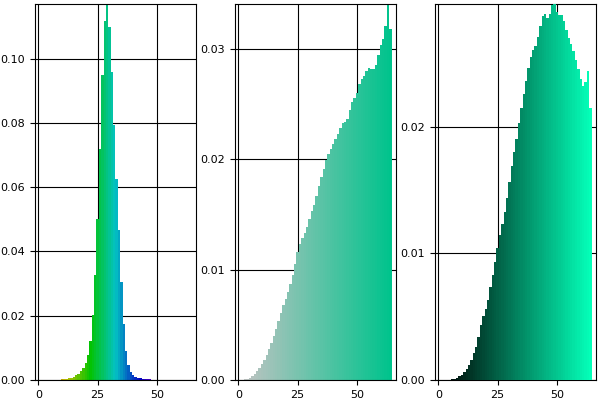

In [21]:
plot_query("greenish blue")

(h_max,s_max,v_max) = (0.484375,0.984375,0.984375)



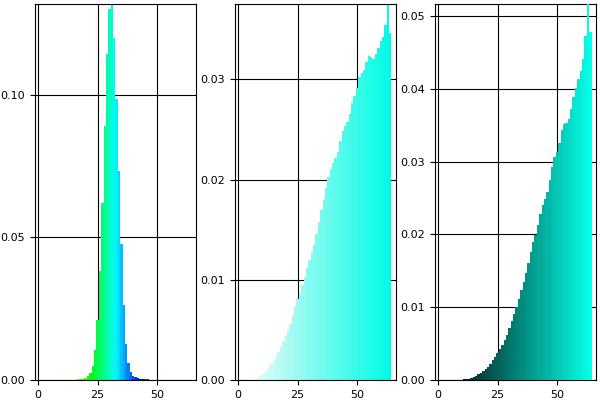

In [22]:
plot_query("turquoise")

In [23]:
1+1

2